# WeRateDogs - Data wrangling project

By Meenakshi Srinivasan

In [1]:
#import the required packages
import requests
import numpy as np
import pandas as pd
import tweepy
import os
import json
from timeit import default_timer as timer
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Data gathering

### 1. Retrieving image file

In [2]:
#get image files using requests package
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
response

<Response [200]>

In [3]:
#creating a folder for image file
folder_name='image predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
#Saving the image file in the folder
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [5]:
#Reading the saved image file
image_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#consumer_key and consumer_secret taken from twitter developer account
consumer_key = "####################"
consumer_secret = "####################"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth

In [7]:
#connecting to twitter api using access_token and access_secret_key
access_token = "####################"
access_token_secret = "####################"
auth.set_access_token(access_token, access_token_secret)

In [8]:
#setting JSON parser to retrieve data from twitter api
api = tweepy.API(auth)

## 2.Retrieving twitter file content 

In [9]:
#reading twitter content
twitter_archive_df = pd.read_csv("twitter-archive-enhanced.csv")

In [10]:
#exploring the dataframe
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 3. Retrieving twitter json content

In [11]:
tweet_ids = list(twitter_archive_df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
        #print(tweet_ids.index(tweet) + 1, "/", "2354")
    except:
        print("Error for: " + str(tweet))
        #print(tweet_ids.index(tweet) + 1, "/", "2354")

'tweet_ids = list(twitter_archive_df.tweet_id)\n\ntweet_data = {}\nfor tweet in tweet_ids:\n    try:\n        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)\n        tweet_data[str(tweet)] = tweet_status._json\n        #print(tweet_ids.index(tweet) + 1, "/", "2354")\n    except:\n        print("Error for: " + str(tweet))\n        #print(tweet_ids.index(tweet) + 1, "/", "2354")'

In [12]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

"with open('tweet_json.txt', 'w') as file:\n    json.dump(tweet_data, file)"

In [13]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
twitter_json_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])


"with open('tweet_json.txt') as file:\n    data = json.load(file)\n    \ndf_list = []\n\nfor tweet_id in data.keys():\n    retweets = data[tweet_id]['retweet_count']\n    favorites = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']\n    df_list.append({'tweet_id': tweet_id,\n                        'retweets': retweets,\n                        'favorites': favorites})\n    \ntwitter_json_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])"

In [15]:
twitter_json_df.head()

,tweet_id,retweets,favorites
0,892420643555336193,7962,37195
1,892177421306343426,5910,31987
2,891815181378084864,3908,24089
3,891689557279858688,8114,40506
4,891327558926688256,8798,38736


# Data assessment

## Assessment of twitter archive dataframe

In [16]:
#exploring twitter_archive dataframe
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
#explore the datatypes of columns in twitter archive 
twitter_archive_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [20]:
#explore the number of unique tweet ID's
twitter_archive_df.tweet_id.nunique()

2356

## Assessment of images dataframe

In [21]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
#explore the datatypes of columns in image dataframe
image_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [23]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
#check the number of empty jpg url
image_df.jpg_url.isna().sum()

0

In [26]:
#explore the count of each dog breed predicted by first algorithm
image_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
Shetland_sheepdog             18
beagle                        18
Maltese_dog                   18
teddy                         18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [27]:
#explore the count of each dog breed predicted by second algorithm
image_df.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
chow                               20
miniature_pinscher                 20
malinois                           20
toy_terrier                        20
Samoyed                            20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [28]:
#explore the count of each dog breed predicted by third algorithm
image_df.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

## Assessment of json content dataframe

In [29]:
twitter_json_df.head()

,tweet_id,retweets,favorites
0,892420643555336193,7962,37195
1,892177421306343426,5910,31987
2,891815181378084864,3908,24089
3,891689557279858688,8114,40506
4,891327558926688256,8798,38736


In [30]:
#explore the datatypes of columns in twitter json dataframe
twitter_json_df.dtypes

tweet_id     int64
retweets     int64
favorites    int64
dtype: object

In [31]:
twitter_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
tweet_id     2332 non-null int64
retweets     2332 non-null int64
favorites    2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [32]:
twitter_json_df.describe()

,tweet_id,retweets,favorites
count,2.332000e+03,2332.000000,2332.000000
mean,7.419155e+17,2799.579760,7757.341338
std,6.821804e+16,4737.699409,12039.277143
min,6.660209e+17,1.000000,0.000000
25%,6.782728e+17,561.750000,1351.000000
50%,7.183508e+17,1311.000000,3378.000000
75%,7.986673e+17,3258.750000,9512.250000
max,8.924206e+17,80421.000000,160722.000000


In [33]:
#check the number of non unique tweet ID's
twitter_json_df.tweet_id.duplicated().sum()

0

### Tidiness 

1) Combining 4 columns of dog names to a single column
2) Creating a master dataframe by merging three dataframes
14) rating_numerator and denominator should be one variable score

### Quality 

3) Only original tweets has to be used and re-tweeted ones should be dropped.
4) Changing the datatype of timestamp field from string to datetime
5) Removing tweets that are beyond Aug 1, 2017
6) Convert tweet_id from int to string-
7) Some dog names are invalid such as "A","An","The"
8) Dropping tweets that has no images
9) Cleaning the denominator that has strange values
10) Correct the 'rating_numerator' values from the text information
11) Optimize the source content by ‘Twitter for iphone’, ‘Twitter Web Client’, and ‘TweetDeck’
12) Change datatypes of columns to their appropriate ones
13) Unwanted columns like 'in_reply_to_status_id','in_reply_to_user_id' should be dropped

# Data cleaning

# Tidiness - Issue 1 - Combining 4 columns of dog names to a single column

### Define:

Dog names are present in four columns so they have to be combined to a single column named 'dog_stage'.

### Code:

In [34]:
#joining four column using apply function
twitter_archive_df['dog_stage'] = twitter_archive_df[twitter_archive_df.columns[-4:]].apply(lambda x:','.join(x.dropna().astype(str)), axis=1)

In [35]:
#stripping empty values
twitter_archive_df['dog_stage'] = twitter_archive_df['dog_stage'].map(lambda x:x.lstrip('None,').rstrip(',None'))

In [36]:
#exploring the values
twitter_archive_df.dog_stage.unique()

array(['', 'dogg', 'pupp', 'pupper', 'floofer', 'doggo,None,None,pupp',
       'doggo,floofer', 'doggo,None,pupper'], dtype=object)

In [37]:
#replace proper values in the dog_stage column
replace_empty_stage = {'':'NaN','doggo,None,None,pupp':'doggo,pupp', 'doggo,None,pupper':'doggo,pupper'}

In [38]:
twitter_archive_df['dog_stage'].replace(replace_empty_stage,inplace=True)

In [39]:
#deleting four separate columns for dog stages
twitter_archive_df.drop(columns=['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

### Test:

In [40]:
#test whether the new column is created and the dog stages present in four different columns are dropped
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


# Tidiness - Issue 2 - Create a master dataframe by merging three dataframes

## Define:

Create a master dataframe by combining three dataframes - twitter_archive_df, image_df and twitter_json_df

## Code:

In [41]:
#Creating a copy of original dataframe before combining
twitter_archive_clean = twitter_archive_df.copy()
twitter_json_clean = twitter_json_df.copy()
image_clean = image_df.copy()

In [42]:
#exporting the original dataframe to csv file
twitter_archive_df.to_csv('twitter_archive_df.csv',index=False)
twitter_json_df.to_csv('twitter_json_df.csv',index=False)
image_df.to_csv('image_df.csv',index=False)

In [43]:
#Creating a master dataframe by merging 3 dataframes, starting with merging twitter_archive_clean and twitter_json_clean
twitter_json_clean.tweet_id = twitter_json_clean.tweet_id.astype('int64')
twitter_json_clean.dtypes
twitter_df = pd.merge(twitter_archive_clean, twitter_json_clean, on='tweet_id', how='left')
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
retweets                      2332 non-null float64
favorites                     2332 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 312.9+ KB


In [44]:
#Displaying details of image_clean dataframe
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [45]:
#Merging twitter_df with image_clean and master dataframe is created
twitter_df = pd.merge(twitter_df, image_clean, on='tweet_id', how='left')
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
retweets                      2332 non-null float64
favorites                     2332 non-null float64
jpg_url                       2075 non-null object
img_num                       

## Test:

In [46]:
twitter_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'retweets', 'favorites',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [47]:
twitter_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2106,670468609693655041,NaN,NaN,2015-11-28 05:05:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Edd. He's a Czechoslovakian Googolplex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670468609...,...,1.0,minivan,0.730152,False,beach_wagon,0.078661,False,car_wheel,0.064346,False
377,828011680017821696,NaN,NaN,2017-02-04 22:45:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brutus and Jersey. They think the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828011680...,...,1.0,American_Staffordshire_terrier,0.936662,True,Staffordshire_bullterrier,0.032999,True,bull_mastiff,0.017183,True
404,824025158776213504,NaN,NaN,2017-01-24 22:44:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""I wish we were dogs"" 14/10 for @BadlandsNPS h...",NaN,NaN,NaN,https://twitter.com/badlandsnps/status/8239662...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,863427515083354112,8.634256e+17,77596200.0,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
954,751793661361422336,NaN,NaN,2016-07-09 15:02:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Fred. He's having one heck of a summer...,NaN,NaN,NaN,https://vine.co/v/5W5YHdTJvaV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Quality - Issue 3 - Remove re-tweeted ones and save only original tweets

## Define: 

Remove retweeted ones and save only the original tweets

## Code: 

In [48]:
#Filtering out only the tweets that has nil retweeted_status_id
twitter_df = twitter_df[twitter_df['retweeted_status_id'].isnull()]

In [49]:
#drop columns related to retweet status
twitter_df.drop(columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)

## Test:

In [50]:
#3 columns related to retweet status are removed
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                2175 non-null object
retweets                 2168 non-null float64
favorites                2168 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf             

# Quality - Issue 4 - Changing the datatype of timestamp field from string to datetime

## Define:

Change the datatype of timestamp to datetime64[ns]

## Code:

In [51]:
#converting datatype of timestamp column from string to datetime
twitter_df['timestamp']=twitter_df['timestamp'].astype('datetime64[ns]')

## Test:

In [52]:
#testing the datatype after conversion
twitter_df.timestamp.dtype

dtype('<M8[ns]')

# Quality - Issue 5 - Removing tweets that are beyond Aug 1, 2017

## Define

Removing the tweets that are beyond Aug 1, 2017

## Code:

In [53]:
s1 = 'Aug 01 00:00:00 2017'

In [54]:
date1 = datetime.datetime.strptime(s1, '%b %d %H:%M:%S %Y')

In [55]:
#counting the number of tweets posted beyond Aug 1, 2017
twitter_df[twitter_df['timestamp'] > date1].tweet_id.count()

2

In [56]:
#Filtering the tweets posted before Aug 1, 2017
twitter_df = twitter_df[twitter_df['timestamp'] < date1]

## Test:

In [57]:
#Testing the number of records
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 2 to 2355
Data columns (total 24 columns):
tweet_id                 2173 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2173 non-null datetime64[ns]
source                   2173 non-null object
text                     2173 non-null object
expanded_urls            2115 non-null object
rating_numerator         2173 non-null int64
rating_denominator       2173 non-null int64
name                     2173 non-null object
dog_stage                2173 non-null object
retweets                 2166 non-null float64
favorites                2166 non-null float64
jpg_url                  1992 non-null object
img_num                  1992 non-null float64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null object
p2                       1992 non-null object
p2_conf     

In [58]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False


# Quality - Issue 6 - Convert tweet_id from int to string

## Define:

Converting tweet_id from int to string

## Code:

In [59]:
#Converting datatype using astype()
twitter_df['tweet_id'] = twitter_df['tweet_id'].astype(str)

## Test: 

In [60]:
twitter_df.tweet_id.dtype

dtype('O')

# Quality - Issue 7 - Some dog names are invalid such as "A","An","The"

## Define 

Invalid names of dogs such as "A","An","The" should be replaced with None

## Code 

In [61]:
#checking the count of each name of dog
twitter_df['name'].value_counts()

None        680
a            55
Charlie      11
Lucy         11
Cooper       10
Oliver       10
Tucker        9
Penny         9
the           8
Lola          8
Sadie         8
Winston       8
Daisy         7
Toby          7
Bo            6
Stanley       6
Bailey        6
Bella         6
Jax           6
Koda          6
Oscar         6
an            6
Milo          5
Leo           5
Buddy         5
Bentley       5
Rusty         5
Chester       5
Louis         5
Dave          5
           ... 
Lolo          1
Binky         1
Rumble        1
Jeffri        1
Maxwell       1
Ronnie        1
Bowie         1
Joshwa        1
Divine        1
Mairi         1
Snoop         1
Storkson      1
Rilo          1
Jaspers       1
Jockson       1
Ralphson      1
Randall       1
Carbon        1
Striker       1
Gin           1
Jarod         1
DonDon        1
Wesley        1
Pete          1
Puff          1
Kulet         1
Al            1
Pilot         1
Maude         1
Happy         1
Name: name, Length: 955,

In [62]:
#display records with no names
pd.set_option('display.max_rows',680)
twitter_df[twitter_df['name'] == 'None'][['tweet_id','text','name']]

,tweet_id,text,name
5,891087950875897856,Here we have a majestic great white breaching ...,None
7,890729181411237888,When you watch your owner call another dog a g...,None
12,889665388333682689,Here's a puppo that seems to be on the fence a...,None
24,887343217045368832,You may not have known you needed to see this ...,None
25,887101392804085760,This... is a Jubilant Antarctic House Bear. We...,None
30,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,None
35,885518971528720385,I have a new hero and his name is Howard. 14/1...,None
37,885167619883638784,Here we have a corgi undercover as a malamute....,None
41,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is gr...",None
42,884247878851493888,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,None


In [63]:
#replace with actual names
twitter_df.loc[twitter_df.tweet_id == '885518971528720385', ['name']] = 'Howard'
twitter_df.loc[twitter_df.tweet_id == '863079547188785154', ['name']] = 'Pablo'
twitter_df.loc[twitter_df.tweet_id == '859607811541651456', ['name']] = 'Zoey'
twitter_df.loc[twitter_df.tweet_id == '856526610513747968', ['name']] = 'Charlie and Mark'
twitter_df.loc[twitter_df.tweet_id == '682047327939461121', ['name']] = 'Thea'
twitter_df.loc[twitter_df.tweet_id == '679736210798047232', ['name']] = 'Sabertooth'
twitter_df.loc[twitter_df.tweet_id == '669363888236994561', ['name']] = 'Zeus'
twitter_df.loc[twitter_df.tweet_id == '669037058363662336', ['name']] = 'Pancho and Peeches'
twitter_df.loc[twitter_df.tweet_id == '668142349051129856', ['name']] = 'Oliver'
twitter_df.loc[twitter_df.tweet_id == '667524857454854144', ['name']] = 'Big Jumpy Rat'
twitter_df.loc[twitter_df.tweet_id == '667509364010450944', ['name']] = 'Tickles'
twitter_df.loc[twitter_df.tweet_id == '666835007768551424', ['name']] = 'Cupit and Prencer'

In [66]:
#Replacing with actual names
twitter_df.loc[twitter_df.tweet_id == '765395769549590528', ['name']] = 'Zoey'
twitter_df.loc[twitter_df.tweet_id == '748692773788876800', ['name']] = 'Quizno'

In [67]:
#test whether data is reflected
print(twitter_df.loc[twitter_df.tweet_id == '765395769549590528', ['name']])

     name
852  Zoey


In [70]:
#Replacing the meaningless names to None
mask = twitter_df.name.str.islower() 
column_name = 'name' 
twitter_df.loc[mask, column_name] = np.nan

## Test:

In [71]:
twitter_df.name.value_counts() 

None                  668
Charlie                11
Lucy                   11
Oliver                 11
Cooper                 10
Tucker                  9
Penny                   9
Lola                    8
Sadie                   8
Winston                 8
Daisy                   7
Toby                    7
Oscar                   6
Koda                    6
Bella                   6
Bailey                  6
Bo                      6
Stanley                 6
Jax                     6
Rusty                   5
Leo                     5
Chester                 5
Buddy                   5
Milo                    5
Bentley                 5
Louis                   5
Scout                   5
Dave                    5
Zoey                    5
Cassie                  4
Archie                  4
Jeffrey                 4
Dexter                  4
Phil                    4
Winnie                  4
Gus                     4
Duke                    4
Finn                    4
Chip        

# Quality - Issue 8 - Dropping tweets that has no images

## Define:

Drop tweets that has no images

## Code:

In [72]:
#checking the number of tweets with empty images
twitter_df.jpg_url.isna().sum()

181

In [73]:
#filtering only the tweets that has images
twitter_df = twitter_df[twitter_df['jpg_url'].notnull()]

## Test:

In [74]:
#testing the dataframe after filtering empty images
twitter_df.jpg_url.isnull().sum()

0

# Quality - Issue 9 - Cleaning the denominator that has strange values

## Define:

Cleaning the denominator that has strange values and keep only the denominator with value 10 

## Code:

In [75]:
#extract the numerator and denominator from the text
rating = twitter_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)')
rating.columns = ['numerator','denominator']


In [76]:
rating.head()

,numerator,denominator
2,12,10
3,13,10
4,12,10
5,13,10
6,13,10


In [77]:
#test whether both the columns have same number of records
print(twitter_df.rating_numerator.count() == rating.numerator.count())
print(twitter_df.rating_denominator.count() == rating.denominator.count())

True
True


In [78]:
#assign values to the twitter_df numerator and denominator columns
twitter_df.rating_numerator = rating.numerator
twitter_df.rating_denominator = rating.denominator

In [79]:
#convert the datatype of numerator and denominator
twitter_df.rating_numerator = twitter_df.rating_numerator.astype('float')
twitter_df.rating_denominator = twitter_df.rating_denominator.astype('float')


In [80]:
twitter_df.rating_denominator.dtype

dtype('float64')

In [81]:
#displaying the records where denominator not equals 10
pd.set_option('display.max_colwidth', 1000)
unclean_denominator_df = twitter_df[twitter_df['rating_denominator'] != 10][['tweet_id','text','rating_denominator','rating_numerator']]
unclean_denominator_df

,tweet_id,text,rating_denominator,rating_numerator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70.0,84.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7.0,24.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150.0,165.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11.0,9.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170.0,204.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20.0,4.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90.0,99.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50.0,45.0


In [82]:
for x in [835246439529840640,775096608509886464,740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296]:
    twitter_df.loc[twitter_df.tweet_id == x, ['rating_denominator']]=10

In [83]:
twitter_df = twitter_df[twitter_df['rating_denominator'] == 10]

## Test: 

In [84]:
twitter_df[twitter_df.rating_denominator!=10].tweet_id.count()

0

# Quality - Issue 10 - Correct the 'rating_numerator' values from the text information

## Define:

Replace the strange rating_numerator values 

## Code:

In [85]:
#Changing numerator
twitter_df.loc[twitter_df.tweet_id == 835246439529840640,['rating_numerator']] = 13
twitter_df.loc[twitter_df.tweet_id == 775096608509886464,['rating_numerator']] = 14
twitter_df.loc[twitter_df.tweet_id == 740373189193256964,['rating_numerator']] = 14
twitter_df.loc[twitter_df.tweet_id == 722974582966214656,['rating_numerator']] = 13
twitter_df.loc[twitter_df.tweet_id == 716439118184652801,['rating_numerator']] = 11
twitter_df.loc[twitter_df.tweet_id == 682962037429899265,['rating_numerator']] = 10
twitter_df.loc[twitter_df.tweet_id == 666287406224695296,['rating_numerator']] = 9

## Test:

In [86]:
for x in [835246439529840640,775096608509886464,740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296]:
    print(twitter_df[twitter_df.tweet_id == x].rating_numerator)

Series([], Name: rating_numerator, dtype: float64)
Series([], Name: rating_numerator, dtype: float64)
Series([], Name: rating_numerator, dtype: float64)
Series([], Name: rating_numerator, dtype: float64)
Series([], Name: rating_numerator, dtype: float64)
Series([], Name: rating_numerator, dtype: float64)
Series([], Name: rating_numerator, dtype: float64)


# Quality - Issue 11 - Optimize the source content by ‘Twitter for iphone’, ‘Twitter Web Client’, and ‘TweetDeck’.

## Define:

Replace the source column with readable content

## Code:

In [87]:
#checking the values of source field
twitter_df['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [88]:
#Replacing with proper values for source column
twitter_df['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone',inplace=True)
twitter_df['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client',inplace=True)
twitter_df['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck',inplace=True)


## Test:

In [89]:
twitter_df.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'], dtype=object)

# Quality - Issue 12 - Change datatypes of columns to their appropriate ones

## Define:

Change source and dog_stage columns to category type

## Code:

In [90]:
#Checking the datatypes of all the columns
twitter_df.dtypes

tweet_id                         object
in_reply_to_status_id           float64
in_reply_to_user_id             float64
timestamp                datetime64[ns]
source                           object
text                             object
expanded_urls                    object
rating_numerator                float64
rating_denominator              float64
name                             object
dog_stage                        object
retweets                        float64
favorites                       float64
jpg_url                          object
img_num                         float64
p1                               object
p1_conf                         float64
p1_dog                           object
p2                               object
p2_conf                         float64
p2_dog                           object
p3                               object
p3_conf                         float64
p3_dog                           object
dtype: object

In [91]:
#Converting the datatypes of source, dog_stage, p1_dog, p2_dog and p3_dog
twitter_df['source'] = twitter_df['source'].astype('category')
twitter_df['dog_stage'] = twitter_df['dog_stage'].astype('str')
twitter_df['p1_dog'] = twitter_df['p1_dog'].astype('bool')
twitter_df['p2_dog'] = twitter_df['p2_dog'].astype('bool')
twitter_df['p3_dog'] = twitter_df['p3_dog'].astype('bool')


# Test:

In [92]:
twitter_df.dtypes

tweet_id                         object
in_reply_to_status_id           float64
in_reply_to_user_id             float64
timestamp                datetime64[ns]
source                         category
text                             object
expanded_urls                    object
rating_numerator                float64
rating_denominator              float64
name                             object
dog_stage                        object
retweets                        float64
favorites                       float64
jpg_url                          object
img_num                         float64
p1                               object
p1_conf                         float64
p1_dog                             bool
p2                               object
p2_conf                         float64
p2_dog                             bool
p3                               object
p3_conf                         float64
p3_dog                             bool
dtype: object

# Quality - Issue 13 - Unwanted columns like 'in_reply_to_status_id','in_reply_to_user_id' should be dropped 

## Define:

'in_reply_to_status_id','in_reply_to_user_id' columns should be dropped

## Code:

In [93]:
twitter_df.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'], inplace=True)

## Test: 

In [94]:
twitter_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweets', 'favorites', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

# Tidiness - Issue 14 - rating_numerator and denominator should be one variable 'score'

## Define: 

rating_numerator and denominator should be one variable 'score'

## Code: 

In [95]:
twitter_df['score'] = twitter_df['rating_numerator']/twitter_df['rating_denominator']

## Test:

In [96]:
twitter_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,score
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,3908.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,8114.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,8798.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,NaN,2925.0,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,1.3
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,NaN,1942.0,...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1.3


In [97]:
#create a csv file to save master dataframe
twitter_df.to_csv('twitter_master_df.csv', index=False)

# Data analysis and visualization

In [98]:
#exploring data
pd.set_option('max_colwidth',1000)
twitter_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,score
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,3908.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,8114.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,8798.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,NaN,2925.0,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,1.3
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,NaN,1942.0,...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1.3


## Analysing the frequency of source for the tweets

In [99]:
sorted_source = twitter_df['source'].value_counts().index

In [100]:
twitter_df['source'].value_counts()

Twitter for iPhone    1935
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

Twitter for iPhone    1935
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64


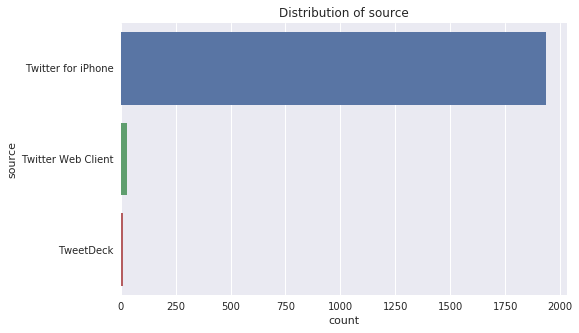

In [101]:
#plotting the count of source
print(twitter_df['source'].value_counts())
plt.figure(figsize=(8,5))
sns.set(style='darkgrid')
sns.countplot(data = twitter_df, y='source', order = sorted_source)
plt.title('Distribution of source')
plt.show()

This plot above shows the distribution of source. We can see that the dominate source of tweets is from iPhone twitter app, which is 94% in the total. That means the twitter app is the main channel for people using to tweet, retweet, post, and others, while the TweetDesk is pretty rare (less than 1%).

## Visualizing the relationship between favorites and retweets

Text(0.5,1,'Relationship between retweets and favorites')

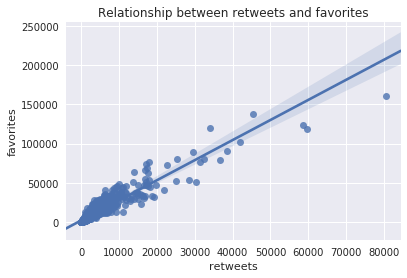

In [102]:
#plot the relationship in scatter plot
sns.regplot(x='retweets',y='favorites',data=twitter_df)
plt.title('Relationship between retweets and favorites')

A reasonable hypothesis is that most popular tweets usually get a large number of retweets and favorite counts. The graph shows a strong positive relationship between ‘retweet_count’ and ‘favorite_count’. 

# Analyzing Prediction 1 

## p1 confidence score visualization 

Text(0.5,1,'p1 Confidence score distribution')

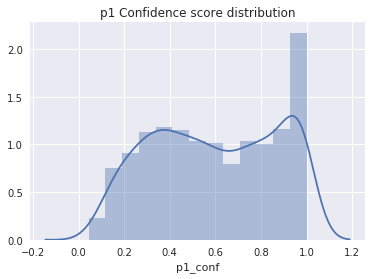

In [103]:
sns.distplot(twitter_df.p1_conf)
plt.title('p1 Confidence score distribution')

##  Visualization of p1 success rate

True     1461
False     513
Name: p1_dog, dtype: int64


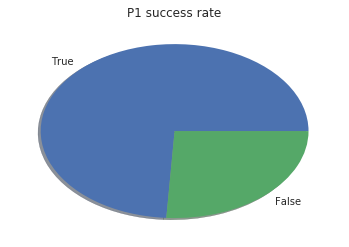

In [104]:
plt.pie(twitter_df.p1_dog.value_counts(),labels=['True','False'],shadow=True)
plt.title('P1 success rate')
print(twitter_df.p1_dog.value_counts())

## Visualization of top 10 breed of dogs predicted by p1 

Text(0.5,1,'Top 10 dog breeds predicted by p1')

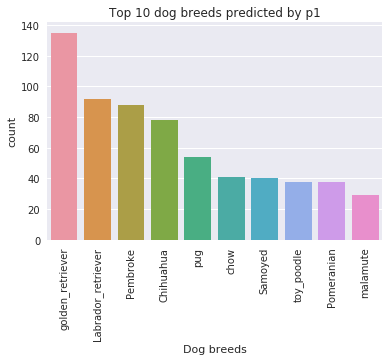

In [105]:
sorted_p1=twitter_df.p1.value_counts().head(10).index
sns.countplot(twitter_df.p1, data=twitter_df,order=sorted_p1)
plt.xticks(rotation=90)
plt.xlabel('Dog breeds')
plt.title('Top 10 dog breeds predicted by p1')

## Visualization of top 10 breeds that received highest number of likes 

In [106]:
fav_count_p1 = twitter_df.groupby('p1').favorites.sum().nlargest(10)
print(fav_count_p1)

p1
golden_retriever      1575236.0
Labrador_retriever    1007959.0
Pembroke               953126.0
Chihuahua              629322.0
Samoyed                492501.0
French_bulldog         448462.0
chow                   389903.0
pug                    299913.0
cocker_spaniel         296042.0
Pomeranian             291475.0
Name: favorites, dtype: float64


Text(0.5,1,'Top 10 breeds that received highest number of likes (p1)')

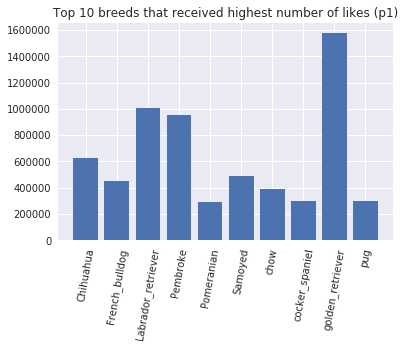

In [107]:
plt.bar(x=fav_count_p1.index, height=fav_count_p1.values)
plt.xticks(rotation=80)
plt.title('Top 10 breeds that received highest number of likes (p1)')

## Top 3 breeds predicted by p1 that received highest scores  

p1
bow_tie               180.60
golden_retriever      156.95
Labrador_retriever    102.40
Name: score, dtype: float64


([<matplotlib.patches.Wedge at 0x7f5568e86a20>,
 [Text(0.305227,1.0568,'bow_tie'),
  Text(-0.932908,-0.582823,'golden_retriever'),
  Text(0.818798,-0.734554,'labrador_retriever')])

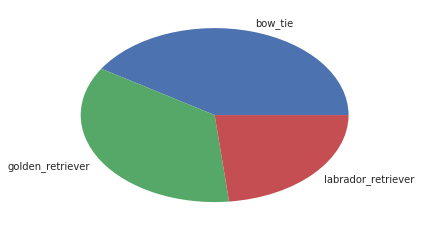

In [108]:
high_score_p1 = twitter_df.groupby('p1').score.sum().nlargest(3)
print(high_score_p1)
plt.pie(high_score_p1.values, labels=['bow_tie','golden_retriever','labrador_retriever'])

## p2 confidence score visualization

Text(0.5,1,'p2 confidence score distribution')

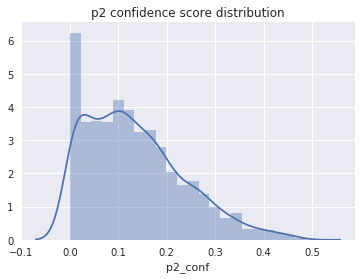

In [109]:
sns.distplot(twitter_df.p2_conf)
plt.title('p2 confidence score distribution')

## Visualization of p2 success rate

True     1478
False     496
Name: p2_dog, dtype: int64


Text(0.5,1,'p2 success rate')

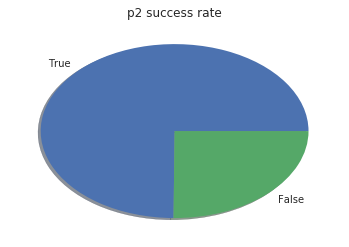

In [110]:
plt.pie(twitter_df.p2_dog.value_counts(),labels=['True','False'],shadow=True)
print(twitter_df.p2_dog.value_counts())
plt.title('p2 success rate')

# Top 10 dog breeds predicted by p2

In [111]:
sorted_p2 = twitter_df.p2.value_counts().nlargest(10).index

Text(0.5,1,'Top 10 dog predictions by second prediction algorithm')

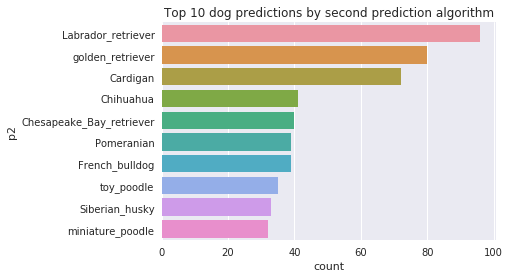

In [112]:
sns.countplot(y='p2', data=twitter_df, order=sorted_p2)
plt.title('Top 10 dog predictions by second prediction algorithm')

##  Visualization of top 10 breeds that received highest number of likes

In [113]:
most_liked_p2 = twitter_df.groupby('p2').favorites.sum().nlargest(10)
print(most_liked_p2)

p2
Labrador_retriever          1414622.0
golden_retriever             806148.0
Cardigan                     763786.0
Pomeranian                   601729.0
Siberian_husky               380845.0
Boston_bull                  367958.0
Chesapeake_Bay_retriever     355223.0
French_bulldog               305015.0
Chihuahua                    300027.0
toy_poodle                   289202.0
Name: favorites, dtype: float64


Text(0,0.5,'Dog breed')

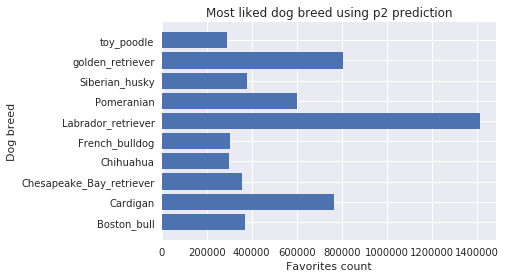

In [114]:
plt.title('Most liked dog breed using p2 prediction')
plt.barh(y=most_liked_p2.index, width=most_liked_p2.values)
plt.xlabel('Favorites count')
plt.ylabel('Dog breed')

##  Top 3 breeds predicted by p2 that received highest scores 

p2
sunglasses            180.20
Labrador_retriever    112.65
golden_retriever       90.80
Name: score, dtype: float64


([<matplotlib.patches.Wedge at 0x7f5568cecc50>,
 [Text(0.104555,1.09502,'sunglasses'),
  Text(-0.818172,-0.735251,'labrador_retriever'),
  Text(0.809689,-0.744583,'golden_retriever')])

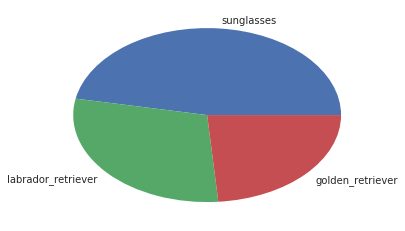

In [115]:
high_score_p2 = twitter_df.groupby('p2').score.sum().nlargest(3)
print(high_score_p2)
plt.pie(high_score_p2.values, labels=['sunglasses','labrador_retriever','golden_retriever'])

##  p3 confidence score visualization

Text(0.5,1,'p3 confidence score distribution')

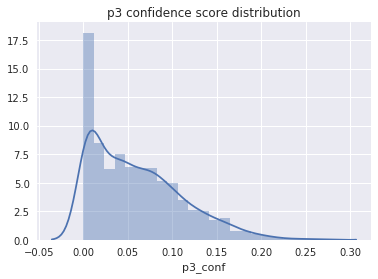

In [116]:
sns.distplot(twitter_df.p3_conf)
plt.title('p3 confidence score distribution')

##  Visualization of p3 success rate

True     1430
False     544
Name: p3_dog, dtype: int64


([<matplotlib.patches.Wedge at 0x7f5568c5c5c0>,
 [Text(-0.712861,0.837753,'True'), Text(0.712861,-0.837753,'False')])

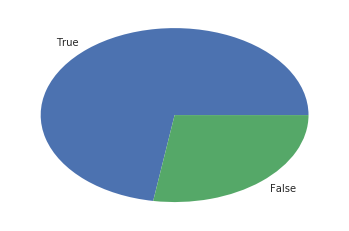

In [117]:
print(twitter_df.p3_dog.value_counts())
plt.pie(twitter_df.p3_dog.value_counts(), labels=['True','False'])

##  Top 10 dog breeds predicted by p3

Text(0,0.5,'Dog breeds')

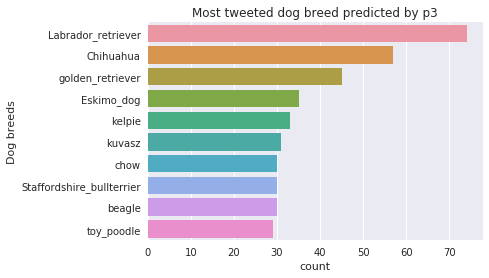

In [118]:
sorted_p3 = twitter_df.p3.value_counts().nlargest(10).index
sns.countplot(y='p3', data=twitter_df, order=sorted_p3)
plt.title('Most tweeted dog breed predicted by p3')
plt.ylabel('Dog breeds')

##  Visualization of top 10 breeds that received highest number of likes 

In [119]:
most_liked_p3 = twitter_df.groupby('p3').favorites.sum().nlargest(10)
print(most_liked_p3)

p3
Labrador_retriever           644729.0
Chihuahua                    437871.0
Pembroke                     351635.0
golden_retriever             348048.0
kelpie                       345970.0
malamute                     341357.0
Staffordshire_bullterrier    339414.0
pug                          332977.0
kuvasz                       323333.0
cocker_spaniel               299259.0
Name: favorites, dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

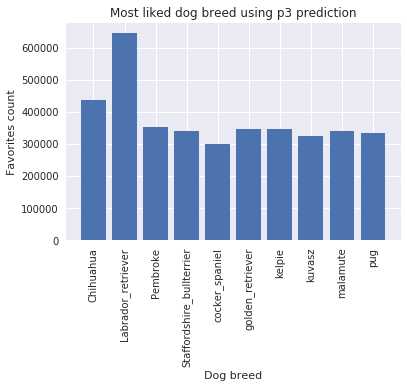

In [120]:
plt.title('Most liked dog breed using p3 prediction')
plt.bar(x=most_liked_p3.index, height=most_liked_p3.values)
plt.ylabel('Favorites count')
plt.xlabel('Dog breed')
plt.xticks(rotation=90)

##  Top 3 breeds predicted by p3 that received highest scores

p3
sunglass              177.6
Labrador_retriever     82.7
Chihuahua              60.8
Name: score, dtype: float64


([<matplotlib.patches.Wedge at 0x7f5568b1a3c8>,
 [Text(-0.182646,1.08473,'bow_tie'),
  Text(-0.4566,-1.00076,'labrador_retriever'),
  Text(0.911051,-0.61643,'labrador_retriever')])

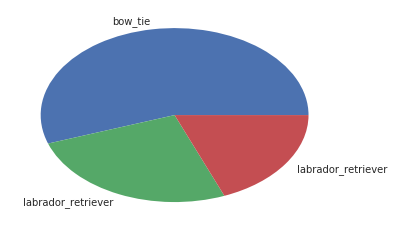

In [121]:
high_score_p3 = twitter_df.groupby('p3').score.sum().nlargest(3)
print(high_score_p3)
plt.pie(high_score_p3.values, labels=['bow_tie','labrador_retriever','labrador_retriever'])

# Insights

1.  We can see that the dominate source of tweets is from iPhone twitter app, which is 94% in the total. That means the twitter app is the main channel for people using to tweet, retweet, post, and others, while the TweetDesk is pretty rare (less than 1%).


2.  The scatter plot shows a strong positive relationship between ‘retweet_count’ and ‘favorite_count’.


3.  From the visualization of p1 prediction, it is evident that, 
    - p1 algorithm has predicted around 75% of the dog breeds accurately.
    - 'Golden retriever', 'Labrador retriever' and 'Pembroke' are the top 3 dog breeds analyzed by p1.
    -  'Golden retriever', 'Labrador retriever' and 'Pembroke' are the top 3 breeds that received highest number of likes.
    -  'Bow tie', 'Golden retriever' and 'Labrador retriever' are the dog breeds that received highest scores.


4.  From the visualization of p2 prediction, it is evident that, 
    - p2 algorithm has predicted around 75% of the dog breeds accurately.
    - 'Labrador retriever' , 'Golden retriever' and 'Cardigan' are the top 3 dog breeds analyzed by p1.
    -  'Labrador retriever' , 'Golden retriever' and 'Cardigan' are the top 3 breeds that received highest number of likes.
    -  'Sunglasses', 'Labrador retriever'  and 'Golden retriever' are the dog breeds that received highest scores.


5.  From the visualization of p3 prediction, it is evident that, 
    - p3 algorithm has predicted around 75% of the dog breeds accurately.
    - 'Labrador retriever' , 'Chihuahua' and 'Golden retriever' are the top 3 dog breeds analyzed by p1.
    -  'Labrador retriever' , 'Chihuahua' and 'Pembroke' are the top 3 breeds that received highest number of likes.
    -  'Sunglasses', 'Labrador retriever'  and 'Chihuahua' are the dog breeds that received highest scores.
